# Breast Cancer Wisconsin Dataset
Taregt: Improve Accuracy - Search (Regularization, Batch Normalization, and validation_split vs validation_data)

- Hasan Samir Hasan


### Initial Model Summary:
#### Model Configuration:
* 3 hidden layers with ReLU (Neurons: 32,16,8).
* 1 Dropout (0.3) Layer
* 1 output layer with Sigmoid for binary classification.
* Binary Crossentropy loss + SGD optimizer.
* epochs=30, batch_size=32
* Validation split using test data
#### Results: 
* accuracy: 0.9294
* loss: 0.1790 
* val_accuracy: 0.9561
* val_loss: 0.1302

- The Model results are not good and not stable where in every execution gives different results.
##### After Adding Seed, the results become reproducibil and gives same results every execution.
* accuracy: 0.9520
* loss: 0.1852
* val_accuracy: 0.9649
* val_loss: 0.0936 

But Still the model has not good accuracy.
## Some Trials:
- epochs=100, batch_size=32 >> accuracy: 0.9607 - loss: 0.1266 - val_accuracy: 0.9825 - val_loss: 0.0741 (Underfitting).

- epochs=120, batch_size=32 >> accuracy: 0.9713 - loss: 0.1225 - val_accuracy: 0.9825 - val_loss: 0.0717 (Improved but still Underfitting).

- epochs=120, batch_size=64 >> accuracy: 0.9507 - loss: 0.1320 - val_accuracy: 0.9737 - val_loss: 0.0871 (Become worse).

- epochs=120, batch_size=16 >> accuracy: 0.9633 - loss: 0.0918 - val_accuracy: 0.9737 - val_loss: 0.0757 (Still is not good enough).

- epochs=264, batch_size=32 >> accuracy: 0.9775 - loss: 0.0729 - val_accuracy: 0.9825 - val_loss: 0.0749 (Improved but still Underfitting)

# The Final Configuration: 
#### Model Configuration:
* 3 hidden layers with ReLU (Neurons: 32,16,8) with Regularization (kernel_regularizer=regularizers.l2(0.01)).
* 1 Dropout (0.3) Layer
* 1 output layer with Sigmoid for binary classification.
* Binary Crossentropy loss + adam optimizer.
* epochs=256, batch_size=32
* Validation split using test data
* accuracy:0.9821 - loss: 0.0924 - val_accuracy: 0.9825 - val_loss: 0.1110

##### Modifying Dropout from 0.3 to 0.2
* accuracy: 0.9876 - loss: 0.0822 - val_accuracy: 0.9825 - val_loss: 0.1055

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.drop(['id'], axis = 1, inplace=True)

In [8]:
df.drop(['Unnamed: 32'], axis = 1, inplace=True)

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [12]:
df['diagnosis'] = df['diagnosis'].map({'M' : 1 , 'B' : 0})

In [13]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [14]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [16]:
x_train.shape

(455, 30)

In [17]:
x_test.shape

(114, 30)

In [18]:
y_train.shape

(455,)

In [19]:
y_test.shape

(114,)

In [20]:
scaler = StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
# Input Layer
inputs = Input(shape=(x_train.shape[1],))

In [23]:
from tensorflow.keras import regularizers

In [24]:
# Fully Connected Layers#kernel_regularizer=regularizers.l2(0.01)
x1 = Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01))(inputs)
x2 = Dense(16,  activation='relu',kernel_regularizer=regularizers.l2(0.01))(x1)
x3 = Dropout(0.2)(x2)
x4 = Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01))(x3)

In [25]:
outputs = Dense(1, activation='sigmoid')(x4)

In [26]:
model = Model(inputs, outputs)

In [27]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=255, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/255
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 156ms/step - accuracy: 0.7160 - loss: 1.1901 - val_accuracy: 0.8947 - val_loss: 0.9652
Epoch 2/255
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8383 - loss: 1.0116 - val_accuracy: 0.9474 - val_loss: 0.8524
Epoch 3/255
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9160 - loss: 0.8887 - val_accuracy: 0.9561 - val_loss: 0.7702
Epoch 4/255
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9053 - loss: 0.8432 - val_accuracy: 0.9649 - val_loss: 0.7072
Epoch 5/255
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9430 - loss: 0.7826 - val_accuracy: 0.9737 - val_loss: 0.6578
Epoch 6/255
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9544 - loss: 0.7167 - val_accuracy: 0.9649 - val_loss: 0.6196
Epoch 7/255
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9617 - loss: 0.6951 - val_accuracy: 0.9649 - val_loss: 0.5887
Epoch 8/255
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9577 - loss: 0.6495 - val_accuracy: 

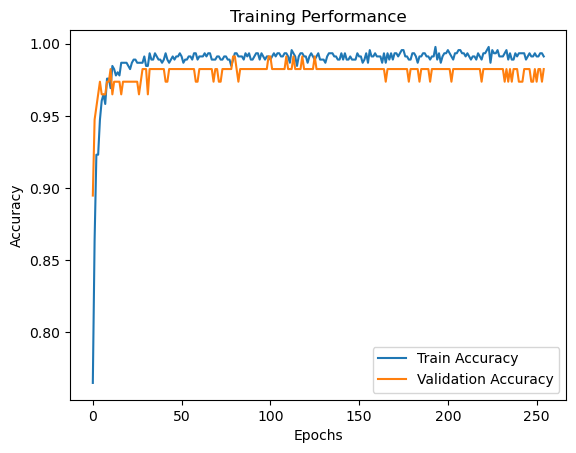

In [30]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Performance')
plt.legend()
plt.show()

# 🔒 Regularization
Goal: Prevent overfitting (when your model memorizes training data instead of generalizing).

How: Adds a penalty to the loss function to discourage complex models.

## 🧮 Types:
1. L1 (Lasso) – Adds absolute value of weights:
Loss = original_loss + λ * Σ|weights|

Can make some weights exactly zero (feature selection).

2. L2 (Ridge) – Adds square of weights:
Loss = original_loss + λ * Σ(weights²)

Penalizes large weights, keeps all features, makes weights smaller.

3. Elastic Net – Mix of L1 and L2.


# ⚖️ Batch Normalization
        is a technique to normalize the inputs to each layer in a neural network during training.
Goal: Speed up training and make it more stable.
How: Normalizes the output of a layer before activation:
* Makes outputs have mean ~0 and std ~1.
* Adds trainable parameters: scale and shift.

## 📈 Benefits:
* Stabilize and speed up training
* Reduce sensitivity to weight initialization
* Often allows for higher learning rates
* Acts like a regularizer, sometimes reducing need for dropout

## 🧪 Why Do We Need It?
* During training, as each layer updates, the distribution of inputs to subsequent layers keeps shifting — this is known as the internal covariate shift.
* This can slow training and make it unstable.
* BatchNorm reduces this shift by keeping inputs to each layer normalized, so layers don't need to constantly readjust.

# validation_split vs validation_data

## 1. validation_data:
You explicitly provide validation inputs and labels.

* Syntax: model.fit(X_train, y_train, validation_data=(X_val, y_val))

* You manually prepare the validation set
* Works with arrays, datasets, or generators

## 2. validation_split:
Automatically splits off a portion of the training data for validation.

Syntax: model.fit(X, y, validation_split=0.2)

* Uses 20% of X and y for validation.
* Only works if X and y are NumPy arrays or tensors.
* Split is done after shuffling, unless shuffle=False.

